In [1]:
addpath('/data/drive/DPhil/THESIS/Cross_study_analyses/learning-repo/scripts')

% load all data sets!
comp='onx';ca=1; pX_analysis_init;
pX_subject_filter;
[SData] = pX_filter_data(sp, 'pX', 1);
subIDs = cellstr(SData.specID);


ans =

    '9.6.0.1099231 (R2019a) Update 1'

Running with visit 1 from Losartan!
Raw participants: 116
Excluded for missing anxiety scores:
    'ss11'
    'ss31'

Participans after anx exlc.: 114
Excluded for failure to distinguish harm from safe:
    'f27'
    'm01'
    'm06'
    'm29'
    'm39'
    'pl16'
    'pl20'
    'ss18'
    'ss19'
    'ss7'

Participans after dist exlc.: 104
   pl9 ... excluding for misunderstanding the task
   ss8_bl7525 ... excluding for missing more than 50% of data
   ss4_bl6040 ... excluding for missing more than 50% of data
   m01_v1 ... excluding for missing more than 50% of data
   m13_v1 ... excluding for missing more than 50% of data
   f39_v1 ... excluding for missing more than 50% of data
   f38_v1 ... excluding for missing more than 50% of data
Participans after all exlc.: 98


### First reported value

60/40 one-way t-test
t(32) = 1.02 p = 0.31348
75/25 one-way t-test
t(96) = 0.15 p = 0.88387
90/10 one-way t-test
t(33) = 1.5 p = 0.14204


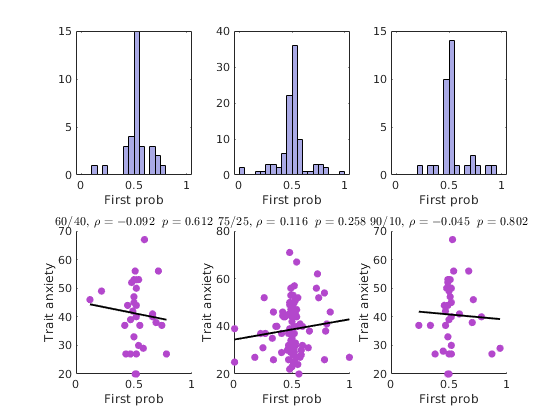

In [2]:
blocks={'60/40', '75/25', '90/10'};
f=figure;
for b = 1:numel(blocks)
 
        
        ta=[];ta = SData.ta(ismember(SData.contingency, blocks{b}));
        sh=[];sh = (SData.first_prob(find_str_in_cell_exact(SData.contingency, blocks{b})));
        idx=[];idx= isnan(ta) | isnan(sh);
        ta(idx) =[];
        sh(idx) =[];
        
        % Histogram
        subplot(2,3,b);
        edges = 0:0.05:1; 
        h=histogram(sh, edges); hold on
        h.FaceAlpha= 0.5;
        h.FaceColor=[0.33 0.33 0.8];
        xlabel('First prob');
        
        % do values differ from 0.5? 
        disp([blocks{b} ' one-way t-test']);
        [h, pi, ci, stats] = ttest(sh, 0.5);
        
        % Scatter plot with anxiety 
        subplot(2,3,b+3);
        
        scatter(sh, ta, 30, 'MarkerFaceColor', [0.7 0.28 0.80], 'MarkerEdgeColor','none');
        plot_linear_fit(sh, ta, [0 0 0], 1.4);
        add_correlation(sh, ta, [blocks{b} ', '])    ;
        xlim([0 1])
        xlabel('First prob');
        ylabel('Trait anxiety');
 
end
f.Position(3) = 800;
f.Position(4) =400;